In [2]:
##In this notebook, I will explore a StockX dataset that includes 50 different models of shoes and many sales made through StockX. The sales included in this dataset will be from Yeezy or the Nike Off-White Collab. We will look into which models have the highest profit margin's in the resale market as well as looking into how much other features such as shoe size and retail price play into the resale market. To begin will we just slowly start taking a look at the headers in our dataset. It is important to note that all the data in this dataset is from the United States StockX sales.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("sneakers.csv")
df

##In this dataframe we have the brand followed by sneaker name, but first we will take a look at the total number of sales by brand.

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island
...,...,...,...,...,...,...,...,...
99951,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$565,$220,12/26/18,8.0,Oregon
99952,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$598,$220,12/26/18,8.5,California
99953,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$605,$220,12/26/18,5.5,New York
99954,2/13/19,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,$650,$220,12/26/18,11.0,California


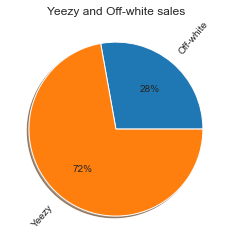

In [25]:
## There was a space in front of yeezy originally, it was causing me issues with counting the values.
df['Brand'] = df['Brand'].replace([' Yeezy'],'Yeezy')

##Totals from sneaker sales of each brand
Off_white_total = (df['Brand']=="Off-White").sum()
Yeezy_total = (df['Brand']== 'Yeezy').sum()

colors = sns.color_palette("tab10")

plt.pie([Off_white_total,Yeezy_total],labels=['Off-white','Yeezy'],colors=colors,autopct='%.0f%%',shadow=True,rotatelabels='true')
plt.title("Yeezy and Off-white sales")
plt.show()

## From the pie chart we can see that Yeezy sales are more abundant than Off-White sales with them making up 72% of the total sales in this dataset. This makes you wonder what is causing such a difference in sales between the two models in the resale market. A few things that could be causing this is market's perceived value of the sneakers. What I mean by this is that Yeezy's were more favoured by consumers at this time. Yeezy's could be cheaper and just more desirable to the average consumer as price is an important factor when buying in the second hand marker. One other aspect that makes me think about why there is such a disparity is that potentially there are more models of Yeezy's than off-white which allows for there to be such a difference I will look to answer these questions using this dataset.


In [4]:
##Before we go any further I want to give a brief introduction to the sneaker resale market and how StockX works as a platform. Over the last few decades we have seen a rise in many sneaker models such as Nike Dunks, Jordan's, Air Maxes and Yeezy's they have all rose to fame as they have changed the shoe world and became some of the most influential shoes in our lifetime. But what makes these models so different from your everyday shoe?. For one, they are a shoe that is very popular in fashion due to their unique looks and colour ways. Another thing is that these shoes specifically are typically low in stock, compared to the average shoe. Nike and Adidas have made a business out of selling shoes in limited quantities where there is a demographic of consumers who won't be able to get a pair. You can see this happening very often if you look at shoe retailers social media content you will constantly find customers in the comments upset that they weren't able to get a pair. An example that always occurs is the nike SNKRS app, how it works is nike will put up a raffle and users will enter in hopes of getting their desired pair. What makes the SNKRS app so popular is that users think they have a good chance but, it usually doesn't go to well. But they continue to enter as it is their only realistic hope of getting a pair for the retail price. Some may ask why doesn't Nike produce more shoes? The reason is that Nike and Adidas have realized they have the perfect amount of demand for these shoes. Due to these shoes being so hard to get for consumers it allows these shoes to keep their prestige to them. As if they were readily available always they would lose popularity and begin to fall off. This is why Nike or Adidas can continue to release so many colourways of the same shoe model and still have somewhat of the same demand. The consumers get to a point of just wanting a pair even if it isn't their most hyped colourway. Where does StockX and other secondhand marketplaces play into this? StockX is a platform that allows users to list items or buy said items. This list of items has increased over the years and isn't just shoes anymore, it can include sports cards, toys, consoles, clothing and collectibles. Now that Nike and Adidas have created all this demand for a shoe but don't have the supply for all of it StockX takes it to their advantage. They have advertised themselves as a safe platform that allows users to buy products and sell them. Users have the ability to list products from their phone or computer and then another user can purchase the same item from their device. Why this is so important is that now the consumers that missed out originally now have a safe way of purchasing shoes after a release. This comes at a cost because now they aren't purchasing from nike and guaranteed the retail price they are purchasing from someone else who has noticed this demand for the shoe. They now must pay for the shoe at a marked up price and then also pay StockX fees on top. Making a once reasonably costing shoe expensive. This is how StockX has taken advantage of this situation and they make money off of both sides of the transaction as they have a fee for buying and selling. Now StockX consistently has avenues to revenue whenever a shoe from Nike or Adidas releases. A few questions i hope to answer is how much is the markup in the secondhand market? What factors truly go into the pricing in the second hand market? How many sales are directly linked to consumers only buying to resell? Is it possible to predict a price?

##** Although the brand says off-white it is a collaboration between nike and off-white I will reference the shoe as nike.

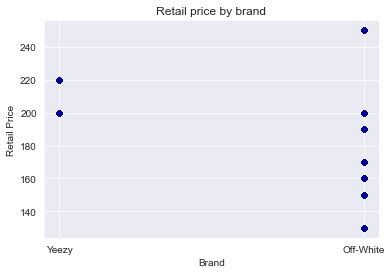

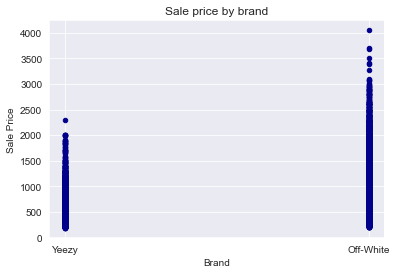

In [29]:
##Lets begin by taking a look at the average profit made on each shoe and then the potentially how much StockX makes from this
##I converted the values in the sale price and retail price columns in order to begin examining how much profit is being made.
df['Sale Price'] = df['Sale Price'].replace("[$,]","",regex=True).astype(int)
df['Retail Price'] = df['Retail Price'].replace("[$,]","",regex=True).astype(int)
##Checking for missing values
(df.isnull().all())
##Creating new profit column
df['Profit'] = df['Sale Price'] - df['Retail Price']
##Plotting the retail prices of these many different models and the resale price
plot = df.plot.scatter(x='Brand',y='Retail Price',c='DarkBlue')
plt.title('Retail price by brand')
plot = df.plot.scatter(x='Brand',y='Sale Price',c='DarkBlue')
plt.title('Sale price by brand')
plt.show()

##From these two plots with sale price and retail price we get an idea of how nike and yeezy are pricing their shoes. For the most part we can see that Nike/off-white typically have a lower retail price then Yeezy. Since many of the shoes in this dataset are just different variants of the same model we can see from this graph that Nike off-white is releasing more models of shoes in comparison. This is due to off-white having more prices on the graph which means that these shoes will be even more exclusive as nike looks to differentiate their releases with off-white. This means there will be more demand as we can see that Nike off-white each model doesn't have many variants in terms of colour and the real differentiation for nike off-white is the model of shoe. Which is correct as we can see in the sale price graph that Nike has many points above the $2000 mark which proves that since Nike is releasing many models it has created a much more valuable sneaker in the second hand market. One of the questions I asked earlier about if Yeezy's may be more desirable due to price may be true as we have seen that their prices are relatively cheaper on StockX.



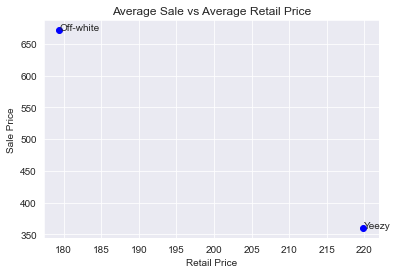

In [45]:
yeezy_data = df.loc[df['Brand']=="Yeezy"]
offwhite_data = df.loc[df['Brand']=="Off-White"]

yeezy_retail_avg = yeezy_data['Retail Price'].mean()
yeezy_sale_avg = yeezy_data['Sale Price'].mean()
offwhite_retail_avg = offwhite_data['Retail Price'].mean()
offwhite_sale_avg = offwhite_data['Sale Price'].mean()

##On average the retail on a Yeezy shoe is $40 more than a Nike shoe but despite being more expensive initially. The Resale value of a Yeezy is $311 less than an off-white. What we can see from this is exclusivity is what truly drives the resale market value. Despite adidas having the more expensive retail value they have a significantly worse resale value. For consumers this is terrible news as they will expect to pay 4 times the retail on average for an off-white nike model. StockX can take advantage of this as they release they're in for a better payday if an off-white nike model is released. Which means they will advertise or even have special deals to ensure they boost sales for that model. So for sellers StockX has a tier system that decides how much of a transaction fee they take. This fee is as high as 10% which is level one or as low 8% which is level 5. (this is using their updated system) so lets assume on average they make 9% per sale.

stock_x_sales = df['Sale Price'].sum()*0.09

## StockX roughly generated 4 million dollars from this small sample size of their sales. We can imagine how much more they make from all their other products that they sell. They also make 6% of the sale price from the buyers side in order to verify the sneaker and prepare it for shipping. StockX best business comes from when they sell products worth thousands of dollars. This is because of how much they charge in fees and the fact that it is the safest place to buy such expensive products. As a consumers buying shoes in the resale market it is very hard to trust as your money isn't going to any of the shoe manufacturers. There are no guarantees you'll get the product you sought after or even have anyone to contact if there is any issues. As in the resale market you're left with very few secure spots to purchase these luxury sneakers. Most consumers won't feel safe spending thousands on a pair and buying off of a local marketplace such as kijiji or facebook marketplace. Now the consumers thoughts after failing to get their desired shoe is "may as well get it from stockx" as it is the easiest option. Which is why it's such a perfect business model as now they are the goto market for any release. Only having to worry about their competiton GOAT. They have them beat out currently as they still offer a wider selection of products on the app.

##Plotting the points for retail x resale
Brands = ['Yeezy', 'Off-white']
Retails = [yeezy_retail_avg,offwhite_retail_avg]
Sales = [yeezy_sale_avg,offwhite_sale_avg]

plt.scatter(Retails,Sales, color="blue")
plt.xlabel("Retail Price")
plt.ylabel("Sale Price")
plt.title("Average Sale vs Average Retail Price")
for i, label in enumerate(Brands):
    plt.annotate(label,(Retails[i],Sales[i]))

plt.show()

In [100]:
## Making a dataframe with the average profit and sale price by shoe size.
## made a copy of data to fill in missing sizes based on company in order to a comparison graph that shows their prices across all sizes.
yeezy_data_copy = yeezy_data.copy()
offwhite_data_copy = offwhite_data.copy()

##Dropped columns that weren't needed for taking a look at the average sale prices.
offwhite_data_copy = offwhite_data_copy.drop(columns = ['Order Date','Sneaker Name','Brand','Release Date','Buyer Region'])
yeezy_data_copy = yeezy_data_copy.drop(columns = ['Order Date','Sneaker Name','Brand','Release Date','Buyer Region'])

## inserting the missing data into our copy data frame
yeezy_data_copy.loc[-1] = [0,0,15,0]
offwhite_data_copy.loc[-1] = [0,0,13.5,0]
offwhite_data_copy.loc[-2] = [0,0,14.5,0]

##Taking the average of sale price and retail price by size
yeezy_sizesavg = yeezy_data_copy.groupby(['Shoe Size']).mean()
offwhite_sizeavg = offwhite_data_copy.groupby(['Shoe Size']).mean()

offwhite_sizeavg




,Sale Price,Retail Price,Profit
Shoe Size,,,
3.5,555.333333,250.000000,305.333333
4.0,588.870488,181.380042,407.490446
4.5,591.225694,174.375000,416.850694
5.0,618.338235,180.220588,438.117647
5.5,588.031359,184.703833,403.327526
6.0,607.579841,178.720272,428.859570
6.5,588.385399,183.242784,405.142615
7.0,621.099641,177.028725,444.070916
7.5,670.666168,180.868263,489.797904


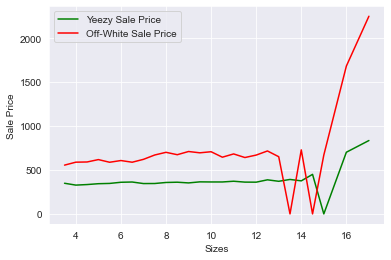

In [111]:
plt.plot(sorted(df['Shoe Size'].unique()),yeezy_sizesavg['Sale Price'],color='g',label = 'Yeezy Sale Price')
plt.plot(sorted(df['Shoe Size'].unique()),offwhite_sizeavg['Sale Price'],color='r',label = 'Off-White Sale Price')
plt.legend()
plt.xlabel('Sizes')
plt.ylabel('Sale Price')
plt.xticks(range(4,18,2))
plt.yticks(range(0,2500,500))
plt.show()

## Now we can see a size by size graph which shows how well yeezy is doing compared to off-white. From this plot we can see that off-white has every yeezy size beat in terms of sales price except for sizes where either brand is missing data for the size. This shows how off-white is more hyped as all the sale prices are higher and even gives consumes and idea of which sizes are more expensive. We can notice that typically sales prices across all adidas sizes are roughly in the same range except for when we get to size 15+ but its safe to assume those sizes are their least sold. As for Off-White we can see a steady increase amongst prices for sizes 6 and above.



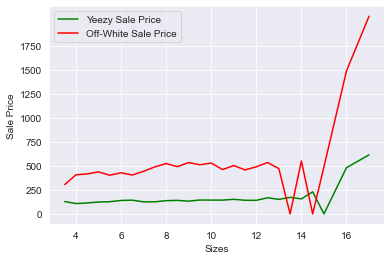

In [115]:
plt.plot(sorted(df['Shoe Size'].unique()),yeezy_sizesavg['Profit'],color='g',label = 'Yeezy Sale Price')
plt.plot(sorted(df['Shoe Size'].unique()),offwhite_sizeavg['Profit'],color='r',label = 'Off-White Sale Price')
plt.legend()
plt.xlabel('Sizes')
plt.ylabel('Sale Price')
plt.xticks(range(4,18,2))
plt.yticks(range(0,2000,250))
plt.show()

##from this graph that demonstrates the profit made on average from each pair we can see that the profit on an Off-white pair is well over $250 usd on every release meaning that this shoe is well over double it's retail value. As a reseller in this shoe market this will be a very attractive shoe to purchase as it has been shown to do extremely well. As for consumers you can expect to have to pay way over market in order to attain a pair which isn't realistic due to most customers values. You will have a small demographic of customers that would be willing to pay these insane amounts for this sneaker. StockX can use this information to their advantage as they now can seek ways to increase sales around the release date. Such as discounts or free shipping to provide an incentive to their consumers. As when paying this much for a sneaker on average any small thing would give the customer piece of mind as they can get a small break. Based purely on profit made from the Off-white shoes we can see that they are doing something special in the sneaker community that adidas lacks.

In [125]:
##I'm gonna take a step away from comparing off-white and adidas and look towards the bigger picture about the actual shoe sales themselves. I want to take a look at how quickly these sales are taking place.

##I wanted to take a look into how many orders are taking place on the same date of a release. Why this was important to me was because it gives me an idea of how many people are going for these releases with the direct intention of selling. While it doesn't paint the whole picture as they can still sell within the next few weeks this helps me understand if there is any reason to sell first day or even buy on the first day.
release_date_sales = (df['Order Date'] == df['Release Date']).sum()

Percentage_of_sales = release_date_sales/len(df.index)*100
Percentage_of_sales

## 4.5% of sales in this dataset have taken place on the release date. Next I want to find out if there is any incentive to purchasing on the first day. Such as the prices being lower or even for buyers to sell on the first day. For buyers the incentive may be that they are able to get rid of the product quickly at a profit they are content with.

fast_sales = df.loc[df['Order Date'] == df['Release Date']]
slower_sales = df.loc[df['Order Date'] != df['Release Date']]
slower_sales.mean()




/var/folders/h0/l9_4hgt1073dw4sryncc231h0000gn/T/ipykernel_24821/162597012.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  slower_sales.mean()


Sale Price      448.185193
Retail Price    208.812218
Shoe Size         9.338279
Profit          239.372975
dtype: float64

In [126]:
fast_sales.mean()
##For potential consumers using StockX the data shows that if they want to purchase a shoe for resale it is likely best to purchase it on the same day of the release as it looks like prices tend to increase the day after. As it is roughly $35 more expensive to purchase shoes after the release date. StockX and sellers on the app don't benefit much from selling early. So StockX should look to do promotions the day after in order to boost sales. As the sale price will be expected to rise following the release as well as more buyers sell after the release. Only 4.5% of sales happen on the first day, they would look forward to trying to decrease this number in order to profit more. They can lower seller fees by 0.5% to encourage more sales post release and advertise it prior to actually releasing the seller fee discount. This gives seller notice and allows them to reconsider how quickly they'll sell.

/var/folders/h0/l9_4hgt1073dw4sryncc231h0000gn/T/ipykernel_24821/3202498955.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fast_sales.mean()


Sale Price      413.943217
Retail Price    204.425541
Shoe Size         9.468626
Profit          209.517676
dtype: float64

array([<AxesSubplot:ylabel='Sale Price'>], dtype=object)

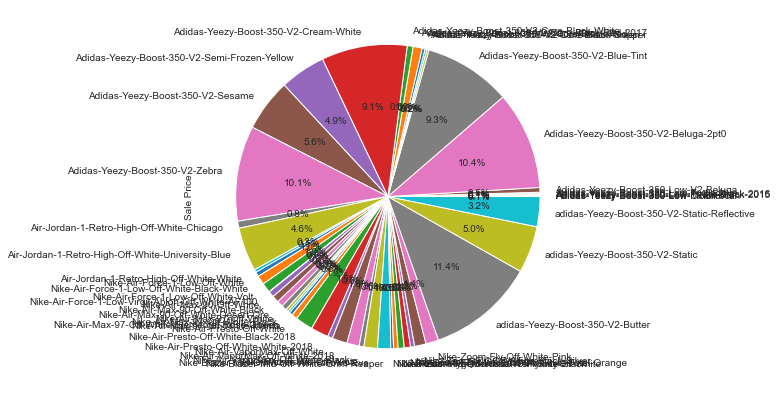

In [143]:
df.groupby('Sneaker Name')['Sale Price'].count().plot(kind='pie',stacked=True,subplots=True,autopct='%1.1f%%',figsize=(7, 7),legend=False)

In [151]:
df.groupby('Sneaker Name')['Sale Price'].count().sort_values(ascending = False)

Sneaker Name
adidas-Yeezy-Boost-350-V2-Butter                     11423
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0                10395
Adidas-Yeezy-Boost-350-V2-Zebra                      10110
Adidas-Yeezy-Boost-350-V2-Blue-Tint                   9297
Adidas-Yeezy-Boost-350-V2-Cream-White                 9097
Adidas-Yeezy-Boost-350-V2-Sesame                      5553
adidas-Yeezy-Boost-350-V2-Static                      4983
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow          4854
Air-Jordan-1-Retro-High-Off-White-University-Blue     4635
adidas-Yeezy-Boost-350-V2-Static-Reflective           3184
Nike-Air-Presto-Off-White-Black-2018                  1884
Nike-Air-Presto-Off-White-White-2018                  1883
Nike-Air-VaporMax-Off-White-2018                      1591
Nike-Blazer-Mid-Off-White-All-Hallows-Eve             1435
Nike-Blazer-Mid-Off-White-Grim-Reaper                 1398
Nike-Zoom-Fly-Off-White-Pink                          1359
Nike-Air-VaporMax-Off-White-Black          

In [160]:
##In this dataset we find Adidas completely dominates the sales as there is only one off-white shoe in the top 10 which is the Air-Jordan-1-Retro-High-Off-White-University-Blue.
df.groupby(['Sneaker Name'])['Sale Price'].mean().sort_values(ascending=False)
##I have found that on average the most expensive shoe in this dataset is the Air-Jordan-1-Retro-High-Off-White-White at an astounding cost of $1826 on average. With a close second being Air-Jordan-1-Retro-High-Off-White-Chicago another style of the air jordan model.

Sneaker Name
Air-Jordan-1-Retro-High-Off-White-White              1826.070288
Air-Jordan-1-Retro-High-Off-White-Chicago            1769.800000
Adidas-Yeezy-Boost-350-Low-Turtledove                1531.661765
Nike-Air-Presto-Off-White                            1236.055369
Adidas-Yeezy-Boost-350-Low-Oxford-Tan                1011.514286
Adidas-Yeezy-Boost-350-Low-Moonrock                   996.710000
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016          984.237705
Nike-Air-Force-1-Low-Virgil-Abloh-Off-White-AF100     975.516129
Adidas-Yeezy-Boost-350-V2-Core-Black-Red              937.754967
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015          895.094737
Nike-Air-Max-97-Off-White-Elemental-Rose-Queen        893.782407
Nike-Air-VaporMax-Off-White                           856.676190
Air-Jordan-1-Retro-High-Off-White-University-Blue     850.853506
Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017         804.304438
Adidas-Yeezy-Boost-350-Low-V2-Beluga                  788.704819
Nike-Blazer-

In [163]:
 df.groupby(['Buyer Region'])['Sale Price'].count().sort_values(ascending=False)

Buyer Region
California              19349
New York                16525
Oregon                   7681
Florida                  6376
Texas                    5876
New Jersey               4720
Illinois                 3782
Pennsylvania             3109
Massachusetts            2903
Michigan                 2762
Virginia                 2058
Ohio                     1890
Maryland                 1870
Washington               1863
Georgia                  1846
Arizona                  1398
North Carolina           1344
Delaware                 1242
Connecticut              1110
Indiana                  1026
Colorado                  954
Wisconsin                 840
Nevada                    790
Tennessee                 731
Minnesota                 725
Missouri                  660
South Carolina            570
Louisiana                 537
Kentucky                  488
Iowa                      460
Alabama                   457
Utah                      450
Oklahoma                  4

array([<AxesSubplot:ylabel='Sale Price'>], dtype=object)

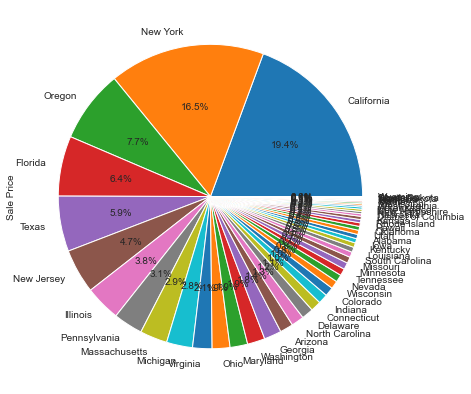

In [166]:
 df.groupby(['Buyer Region'])['Sale Price'].count().sort_values(ascending=False).plot(kind='pie',stacked=True,subplots=True,autopct='%1.1f%%',figsize=(7, 7),legend=False)
## The states that make up the most of the sales are California, New York, Oregon and Florida. It is important to not that these 4 states make up 50% of their sales. The sales distribution is heavily skewed between these 4, and it would be worthwhile to continuously promote different promotions and as well as upcoming releases specifically in these regions. As this is where most of the business comes from. This may have to do with the environment as fashion is key in places like New York and California.Many residents will look to StockX in order to improve their wardrobe.

In [173]:
##We will take a look into the most popular shoes for the two most popular states.
california = df.loc[df['Buyer Region'] == "California"]
california.groupby('Sneaker Name')['Order Date'].count().sort_values(ascending=False)

Sneaker Name
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0                2146
adidas-Yeezy-Boost-350-V2-Butter                     1810
Adidas-Yeezy-Boost-350-V2-Zebra                      1737
Adidas-Yeezy-Boost-350-V2-Blue-Tint                  1682
Adidas-Yeezy-Boost-350-V2-Cream-White                1653
Adidas-Yeezy-Boost-350-V2-Sesame                     1045
Air-Jordan-1-Retro-High-Off-White-University-Blue    1005
adidas-Yeezy-Boost-350-V2-Static                      923
adidas-Yeezy-Boost-350-V2-Static-Reflective           696
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow          587
Nike-Air-Presto-Off-White-Black-2018                  437
Nike-Air-Presto-Off-White-White-2018                  389
Nike-Blazer-Mid-Off-White-Grim-Reaper                 335
Nike-Blazer-Mid-Off-White-All-Hallows-Eve             330
Nike-Air-VaporMax-Off-White-2018                      315
Nike-Air-VaporMax-Off-White-Black                     302
Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017         250
N

In [174]:
New_York= df.loc[df['Buyer Region'] == "New York"]
New_York.groupby('Sneaker Name')['Order Date'].count().sort_values(ascending=False)

Sneaker Name
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0                1957
adidas-Yeezy-Boost-350-V2-Butter                     1852
Adidas-Yeezy-Boost-350-V2-Zebra                      1744
Adidas-Yeezy-Boost-350-V2-Blue-Tint                  1546
Adidas-Yeezy-Boost-350-V2-Cream-White                1371
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow          968
Adidas-Yeezy-Boost-350-V2-Sesame                      961
adidas-Yeezy-Boost-350-V2-Static                      777
Air-Jordan-1-Retro-High-Off-White-University-Blue     683
adidas-Yeezy-Boost-350-V2-Static-Reflective           339
Nike-Air-Presto-Off-White-Black-2018                  311
Nike-Air-Presto-Off-White-White-2018                  295
Nike-Air-VaporMax-Off-White-2018                      276
Nike-Blazer-Mid-Off-White-Grim-Reaper                 257
Nike-Air-VaporMax-Off-White-Black                     244
Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017         234
Nike-Blazer-Mid-Off-White-All-Hallows-Eve             230
N

In [ ]:
## Interestingly enough we can see that both California and New York share the same Top 10 most purchased shoes. This shows they have a similar demographic of consumers for StockX which is great as their 2 best region have similar taste. When marketing to either the same tactics should work as they aren't too far apart when it comes to tastes. As well as we can see that for both regions Yeezy dominates as they are 9 out of the 10 most purchased sneaker. Yeezy is very popular amongst the general population but doesn't have the same hype as Off-White. Which is shown in their resale value.